# FDS Project

We will focus on answering the first queston, regarding the performance of Scottish and A&E services. Below, we will post our code, as well as our visualisations for the data.

We handle all the necessary imports below.

In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import seaborn as sns
import math
#Importing sklearn functions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf

First, we will load the dataset and clean it.

In [48]:
data = pd.read_csv('./ae_activity_waiting_times_feb2022-data.csv')

# cleaning the dataset

# first, we will remove the episodic values columns
data = data.drop(['Number_of_Attendances_Epi', 'Number_Meeting_Target_epi', 'Treatment_Location_Code', 'ED_MIU'], 1)

# next, we will handle all the NaN values
data = data.fillna(0)

C:\Users\aksha\AppData\Local\Temp\ipykernel_17216\1892493142.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['Number_of_Attendances_Epi', 'Number_Meeting_Target_epi', 'Treatment_Location_Code', 'ED_MIU'], 1)


Next, we will group the dataset based on certain characteristics, which we will use for making the visualisations.

In [49]:
# we will group the integer data by date and store it in a new dataset
grouped_data_date = data.groupby(data['Data_Month_Date'], sort = False)
grouped_data_date = grouped_data_date.sum()

# we will also group the integer data by treatment description and store it in a new dataset
grouped_data_location_description = data.groupby(data['HB_Treatment_Description'])
grouped_data_location_description = grouped_data_location_description.sum()

# we will also group the integer data by location name and store it in a dataset
grouped_data_location = data.groupby(data['Treatment_Location_Name'])
grouped_data_location = grouped_data_location.sum()

After grouping, we will create the visualisations to answer only the mandatory part of the project.

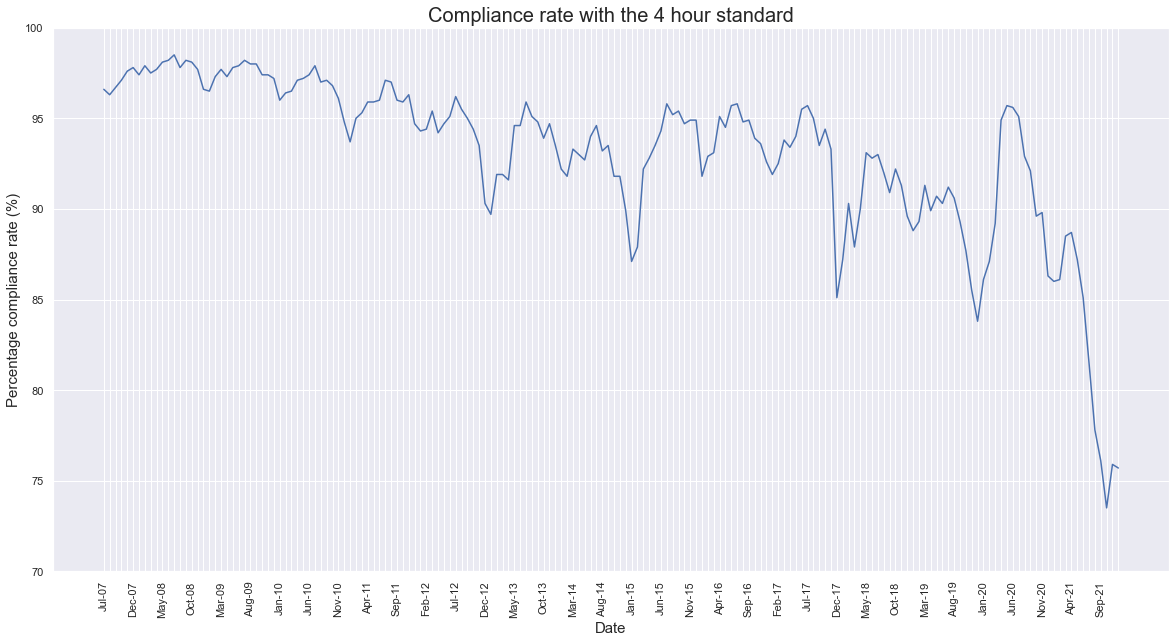

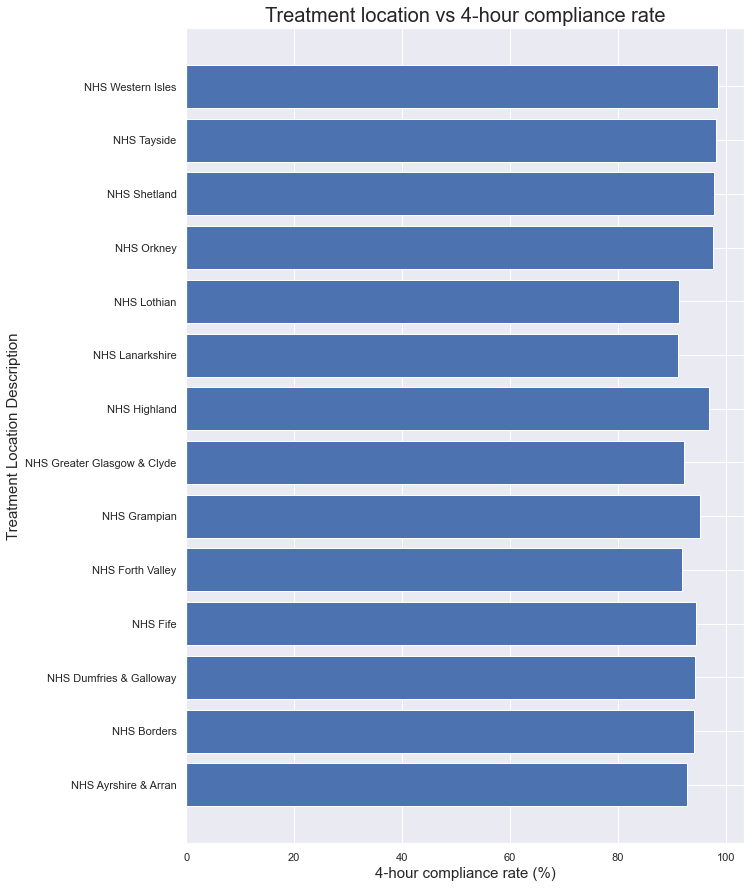

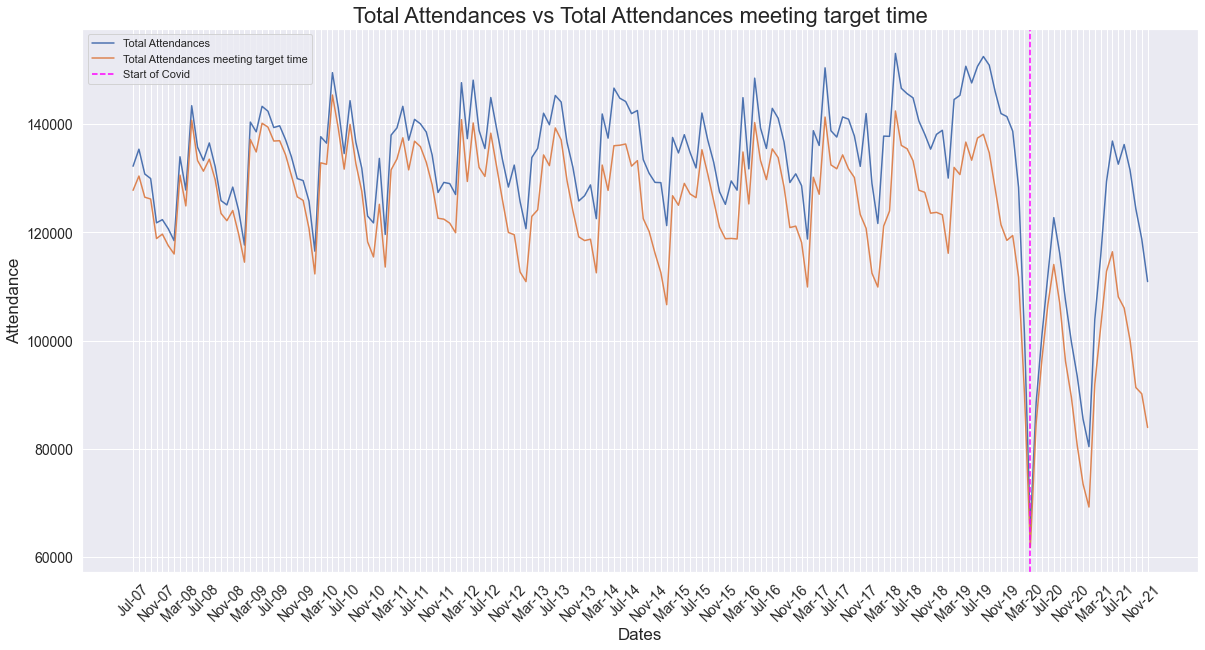

In [50]:
# first visualisation
grouped_data_date["Compliance_Rate"] = round ((grouped_data_date['Number_Meeting_Target_agg'] / grouped_data_date['Number_Of_Attendances_agg']) * 100, 1)
dates = grouped_data_date.index.to_numpy()

fig, ax1 = plt.subplots(figsize = (20, 10))
ax1.plot(dates, grouped_data_date["Compliance_Rate"])
ax1.set_title("Compliance rate with the 4 hour standard", fontsize = 20)
ax1.set_xlabel("Date", fontsize = 15)
for position, xlabel in enumerate(ax1.get_xticklabels()):
    if position % 5 != 0:
        xlabel.set_visible(False)
ax1.tick_params(axis = 'x', rotation = 90)
ax1.set_ylabel("Percentage compliance rate (%)", fontsize = 15)
ax1.set_yticks(np.arange(70, 105, 5))
plt.show()

# second visualisation
grouped_data_location_description["Compliance_Rate"] = round ((grouped_data_location_description['Number_Meeting_Target_agg'] / grouped_data_location_description['Number_Of_Attendances_agg']) * 100, 1)
fig, ax1 = plt.subplots(figsize=(10, 15))
ax1.barh(grouped_data_location_description.index, grouped_data_location_description['Compliance_Rate'], align='center')
ax1.set_title("Treatment location vs 4-hour compliance rate", fontsize=20)
ax1.set_xlabel("4-hour compliance rate (%)", fontsize=15)
ax1.set_ylabel("Treatment Location Description", fontsize=15)
plt.show()

# third visualisation
numberOfTotalAttendances = grouped_data_date["Number_Of_Attendances_agg"].to_numpy()
numberOfAttendancesMeetingTarget = grouped_data_date["Number_Meeting_Target_agg"].to_numpy()
Dates = grouped_data_date.index.to_numpy()

fig, (ax1) = plt.subplots(figsize=(20,10))
ax1.plot(Dates,numberOfTotalAttendances ,label = "Total Attendances")
ax1.plot(Dates,numberOfAttendancesMeetingTarget,label = "Total Attendances meeting target time")
ax1.set_title("Total Attendances vs Total Attendances meeting target time", fontsize = 22)
ax1.set_xlabel("Dates", fontsize = 17)
ax1.set_ylabel("Attendance", fontsize = 17)
ax1.axvline(x = 153, color = 'magenta', label = 'Start of Covid', linestyle = ("--"))
plt.xticks(rotation = 45,fontsize= 14)
plt.legend()
plt.yticks(fontsize = 14)
for position, xlabel in enumerate(ax1.get_xticklabels()):
    if position % 4 != 0:
        xlabel.set_visible(False)

Following that, we will make visualisations to address the first extra question for the project.

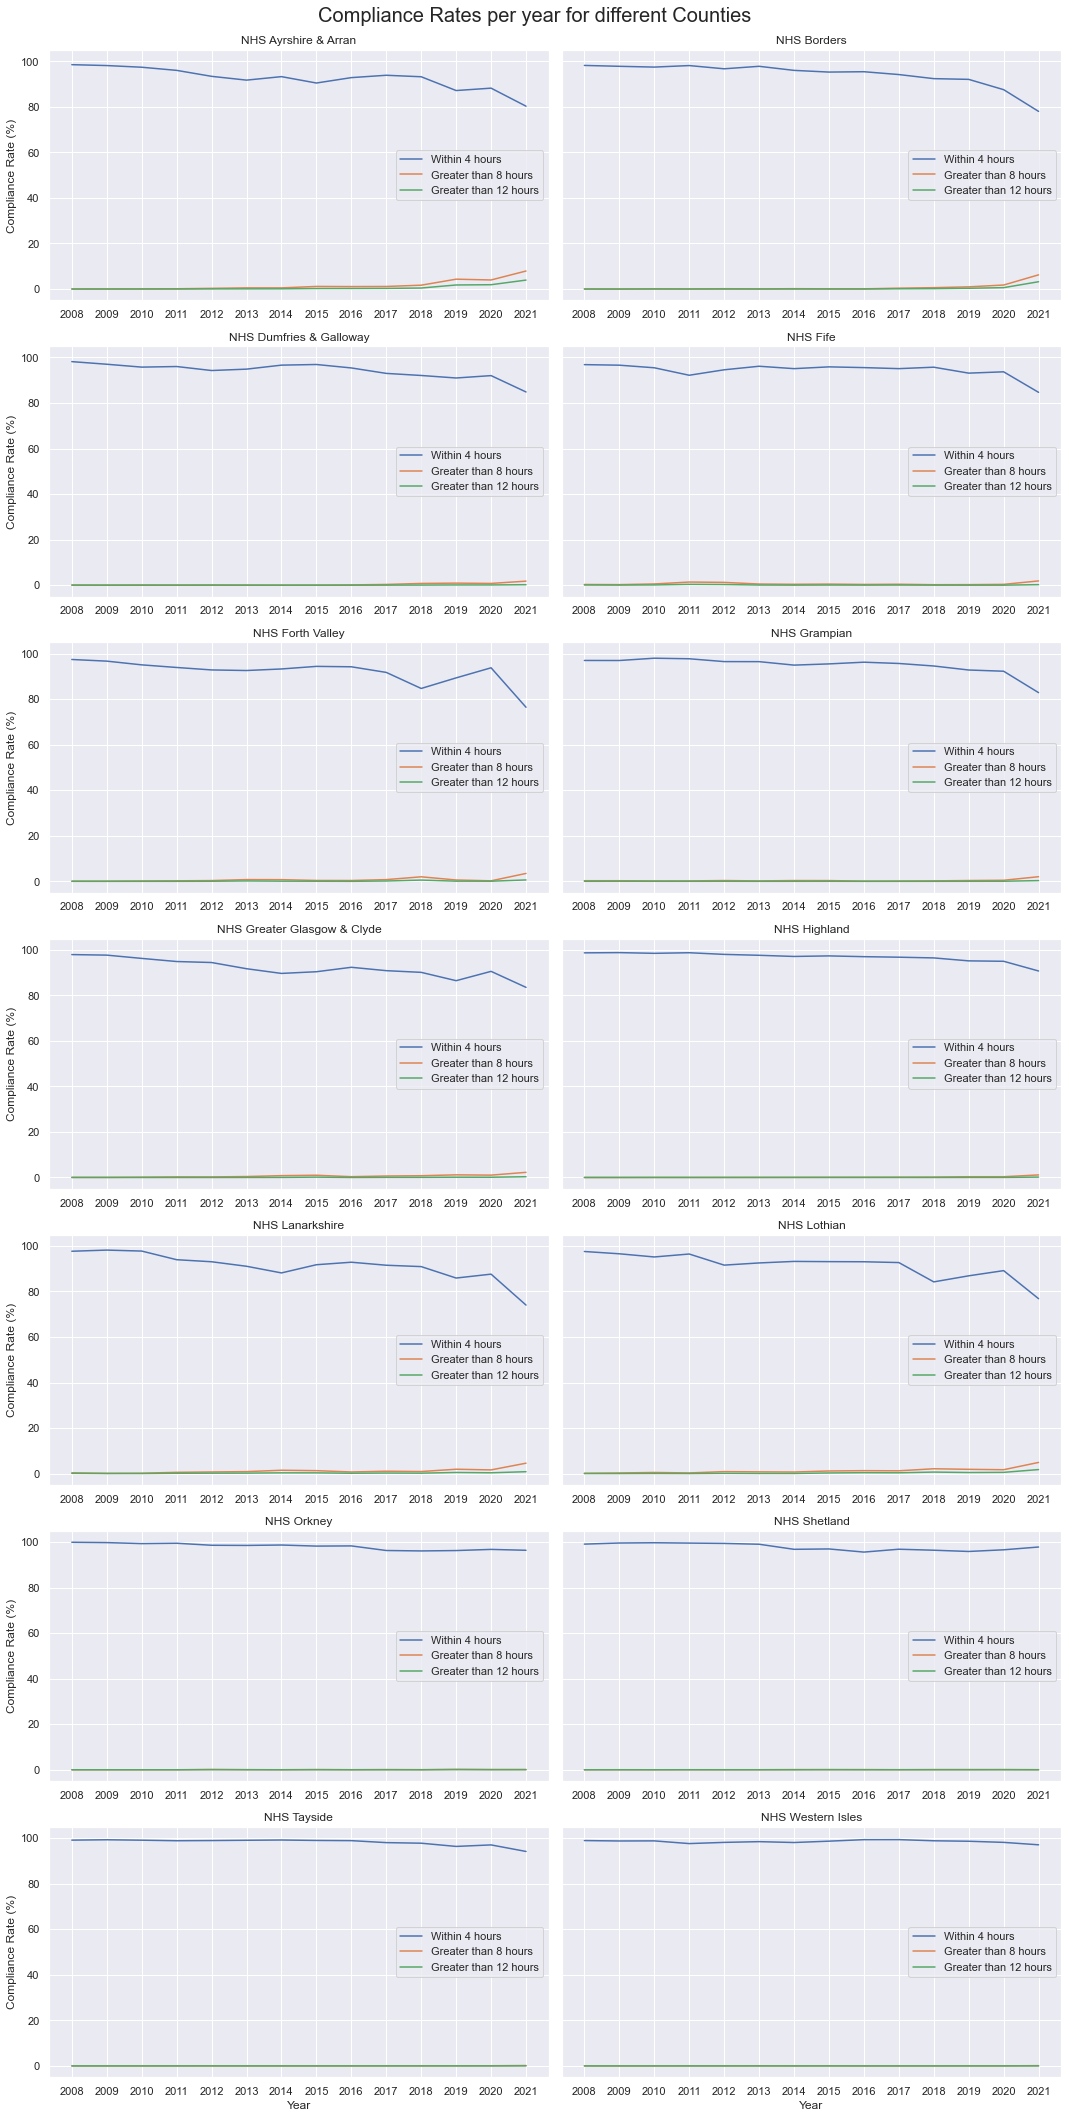

In [51]:
# summing the data according to years for each county since 2008

# grouping according to date and location
grouped_data_location_date = data.groupby(['HB_Treatment_Description', 'Data_Month_Date'], sort=False).sum()

# Instantiating variables
counties = grouped_data_location_description.index
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
allYears = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
attendancesGreater12hrsPerLocation = []
attendancesGreater8hrsPerLocation = []
complianceRates4hrsPerLocation = []

# summing for each year separately for each county
for county in counties:
    complianceRates4hrs = []
    attendancesGreater8hrs = []
    attendancesGreater12hrs = []
    for year in allYears:
        complianceRate4hrs = 0
        attendanceGreater8hrs = 0
        attendanceGreater12hrs = 0
        totalAttendance = 0
        for month in months:
            time = month + "-" + year[-2:]
            complianceRate4hrs += grouped_data_location_date.loc[(county,time)]["Number_Meeting_Target_agg"]
            attendanceGreater8hrs += grouped_data_location_date.loc[(county,time)]["Attendance_greater_8hrs"]
            attendanceGreater12hrs += grouped_data_location_date.loc[(county,time)]["Attendances_greater_12hrs"]
            totalAttendance += grouped_data_location_date.loc[(county,time)]["Number_Of_Attendances_agg"]
        complianceRates4hrs.append((complianceRate4hrs/totalAttendance) * 100)
        attendancesGreater8hrs.append((attendanceGreater8hrs/totalAttendance) * 100)
        attendancesGreater12hrs.append((attendanceGreater12hrs/totalAttendance) * 100)
    complianceRates4hrsPerLocation.append((county, complianceRates4hrs))
    attendancesGreater8hrsPerLocation.append((county, attendancesGreater8hrs))
    attendancesGreater12hrsPerLocation.append((county, attendancesGreater12hrs))


# # Create Line Graph
# fig = plt.figure(figsize = (14,6))
# ax = fig.add_axes([0,0,1,1])
# for i in range(len(counties)):
#     ax.scatter(allYears,complianceRates4hrsPerLocation[i][1])
# ax.set_title("Compliance Rate per year for different Counties", fontsize = 20)
# ax.set_xlabel("Year", fontsize = 15)
# ax.set_ylabel("Compliance Rate (%)", fontsize = 15)
# ax.legend(counties)
# plt.show()

# Create scatter plots for each county
fig, ax = plt.subplots(int(len(counties)/2), 2, figsize=(15,30), sharey=True)
for i in range(len(counties)):
    ax[int(i/2)][i % 2].plot(allYears,complianceRates4hrsPerLocation[i][1])
    ax[int(i/2)][i % 2].plot(allYears,attendancesGreater8hrsPerLocation[i][1])
    ax[int(i/2)][i % 2].plot(allYears,attendancesGreater12hrsPerLocation[i][1])
    ax[int(i/2)][i % 2].set_title(counties[i])
    ax[int(i/2)][i % 2].legend(["Within 4 hours", "Greater than 8 hours", "Greater than 12 hours"])
fig.suptitle("Compliance Rates per year for different Counties", fontsize = 20)
plt.setp(ax[-1, :], xlabel="Year")
plt.setp(ax[:, 0], ylabel="Compliance Rate (%)")
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.show()

Lastly, we will make visualisations to address the second extra question for the project.

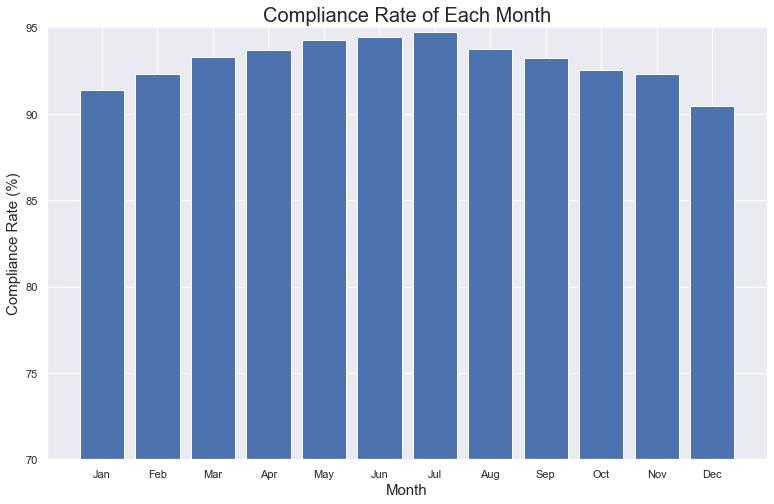

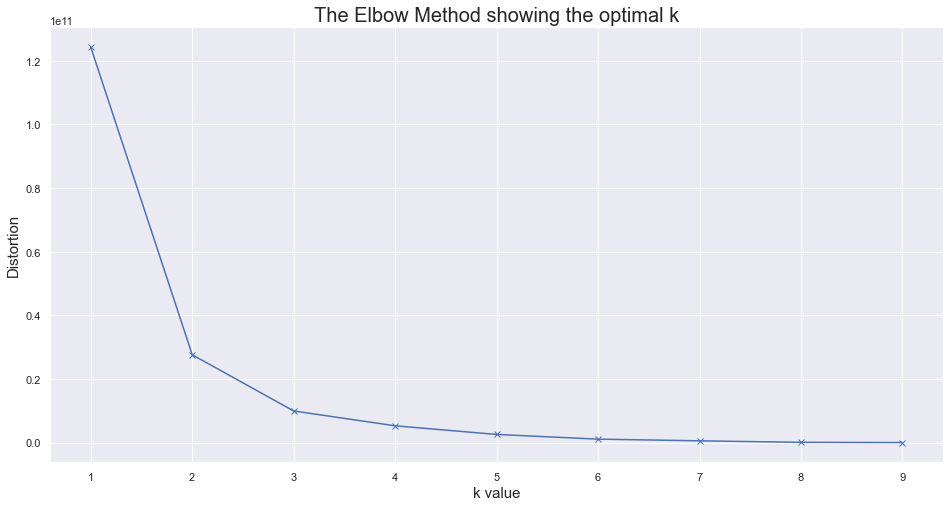

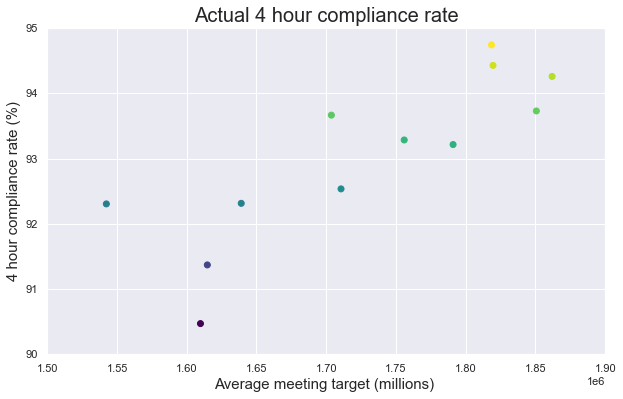

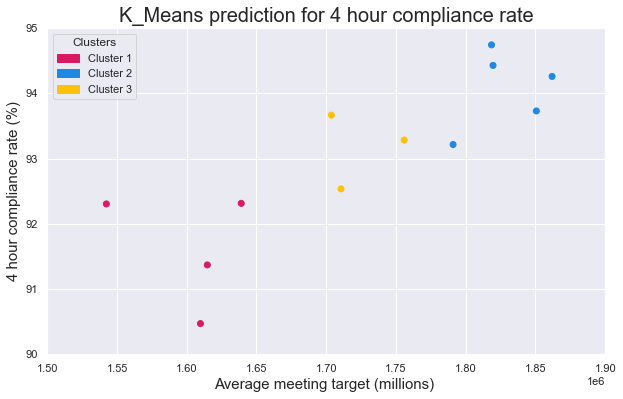

Clusters from the K-means visualisation

Cluster 1
0     Jan
1     Feb
10    Nov
11    Dec
Name: Month, dtype: object

Cluster 2
2    Mar
3    Apr
9    Oct
Name: Month, dtype: object

Cluster 3
4    May
5    Jun
6    Jul
7    Aug
8    Sep
Name: Month, dtype: object



In [52]:
# Create instantiation Variables
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
allYears = ["08","09","10","11", "12","13","14","15","16","17","18","19","20","21"]
meetingTargets = []
complianceRates = []
# Collect the average compliance rate of each Summer
for month in months:
    meetingTarget = 0
    totalAttendance = 0
    for year in allYears:
        time = month + "-" + year
        meetingTarget = meetingTarget + grouped_data_date.loc[time]["Number_Meeting_Target_agg"]
        totalAttendance = totalAttendance + grouped_data_date.loc[time]["Number_Of_Attendances_agg"]
    meetingTargets.append(meetingTarget)
    complianceRate = (meetingTarget/totalAttendance) * 100
    complianceRates.append(complianceRate)

# Create Bar Chart
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(months,complianceRates)
ax.set_title("Compliance Rate of Each Month", fontsize = 20)
ax.set_xlabel("Month", fontsize = 15)
ax.set_ylabel("Compliance Rate (%)", fontsize = 15)
ax.set_ylim([70, 95])
plt.show()

# setting up the data

data = pd.DataFrame()
data['4 hour compliance rate (%)'] = complianceRates
data['Average meeting target'] = meetingTargets

# elbow method for choosing optimal k value for k-means clustering

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k value', fontsize = 15)
plt.ylabel('Distortion', fontsize = 15)
plt.title('The Elbow Method showing the optimal k', fontsize = 20)
plt.show()

# k-means algorithm with k = 3 by the elbow method

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)
data['k_means']=kmeanModel.predict(data)

plt.figure(figsize = (10,6))
plt.scatter(data['Average meeting target'], data['4 hour compliance rate (%)'], c= data['4 hour compliance rate (%)'], cmap = 'viridis')
plt.title('Actual 4 hour compliance rate', fontsize=20)
plt.xlabel("Average meeting target (millions) ", fontsize = 15)
plt.xticks(range(1500000, 1950000, 50000))
plt.ylabel("4 hour compliance rate (%)", fontsize = 15)
plt.yticks(range(90, 96, 1))
plt.show()

colours_2 = ListedColormap(["#D81B60", "#1E88E5", "#FFC107"])
plt.figure(figsize = (10,6))
plt.scatter(data['Average meeting target'], data['4 hour compliance rate (%)'], c=data['k_means'], cmap = colours_2)
plt.title('K_Means prediction for 4 hour compliance rate', fontsize=20)
plt.xlabel("Average meeting target (millions) ", fontsize = 15)
plt.xticks(range(1500000, 1950000, 50000))
plt.ylabel("4 hour compliance rate (%)", fontsize = 15)
plt.yticks(range(90, 96, 1))
patch1 = mpatches.Patch(color='#D81B60', label='Cluster 1')
patch2 = mpatches.Patch(color='#1E88E5', label='Cluster 2')
patch3 = mpatches.Patch(color='#FFC107', label='Cluster 3')
plt.legend(handles = [patch1, patch2, patch3], title = "Clusters")
plt.show()

# retrieve the individual clusters for more details
data['Month'] = months

cluster_1 = data[data['Average meeting target'] < 1650000]
cluster_1 = cluster_1['Month']

cluster_2 = data[data['Average meeting target'] < 1780000]
cluster_2 = cluster_2[cluster_2['Average meeting target'] >= 1650000]
cluster_2 = cluster_2['Month']

cluster_3 = data[data['Average meeting target'] >= 1780000]
cluster_3 = cluster_3['Month']

# lastly, display the cluster values for all 3 clusters

print("Clusters from the K-means visualisation")
print()
print("Cluster 1")
print(cluster_1)
print()
print("Cluster 2")
print(cluster_2)
print()
print("Cluster 3")
print(cluster_3)
print()

C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Compliance_Rate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           7.87e-33
Time:                        00:52:23   Log-Likelihood:                -438.18
No. Observations:                 174   AIC:                             880.4
Df Residuals:                     172   BIC:                             886.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.0715      0.460    215.463      0.000      98.164      99.979
Months        -0.0680      0.005    -14.918      0.000      -0.077      -0.059
==============================================================================
Omnibus:                       67.926   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.900
Skew:                          -1.476   Prob(JB):                     8.16e-58
Kurtosis:                       8.249   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

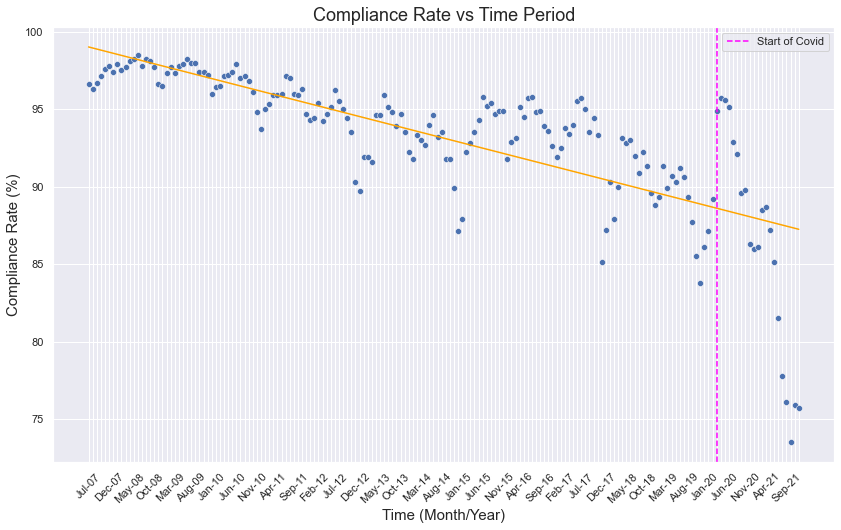

In [53]:
# applying linear regression to first plot
months = [i for i in range(1,len(grouped_data_date.index)+1)]
grouped_data_date['Months'] = months
month = grouped_data_date.index.to_numpy()
model = smf.ols('Compliance_Rate ~ Months', data=grouped_data_date)
results = model.fit()
sns.scatterplot(data=grouped_data_date, y='Compliance_Rate', x='Data_Month_Date')
y_hat = results.predict(grouped_data_date['Months'])
linReg = sns.lineplot(month, y_hat, color='orange')
linReg.set_title("Compliance Rate vs Time Period", fontsize = 18)
for position, xlabel in enumerate(linReg.get_xticklabels()):
    if position % 5 != 0:
        xlabel.set_visible(False)
    else:
        xlabel.set(rotation=45)

linReg.set_xlabel("Time (Month/Year)", fontsize = 15)
linReg.set_ylabel("Compliance Rate (%)", fontsize = 15)
linReg.axvline(x = 153, color = 'magenta', label = 'Start of Covid', linestyle = ("--"))
plt.legend()
sns.set(rc = {'figure.figsize':(14,8)}) 


results.summary()